# Some tests with Graphs.jl



In [2]:
# Install packages - Needed only once   
using Pkg
Pkg.activate(".")

  Activating project at `~/src_nobackup/julia_ml_tests.jl.git/graph_neural_networks`


In [3]:
# Load packages
using Graphs
using Plots, GraphRecipes
using SparseArrays

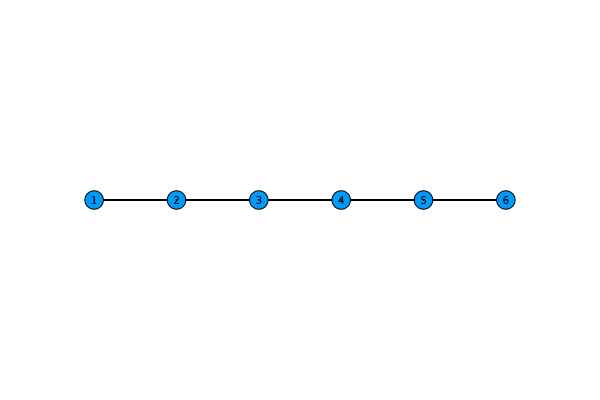

In [4]:
# First graph is a linear path
g_path = path_graph(6)
graphplot(g_path, curves=false, linewidth=2, x=1:6,y=zeros(6), nodesize=0.5,names=1:6, nodeshape=:circle)

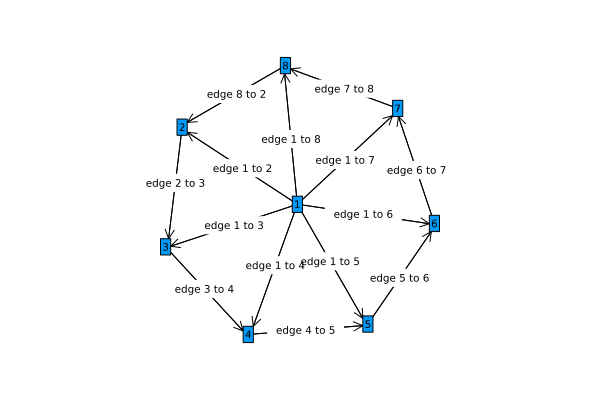

In [5]:
# A directed Wheel graph
n = 8
g_wheel = wheel_digraph(n)
edgelabel_dict = Dict()
edgelabel_mat = Array{String}(undef, n, n)
for i in 1:n
    for j in 1:n
        edgelabel_mat[i, j] = edgelabel_dict[(i, j)] = string("edge ", i, " to ", j)
    end
end
edgelabel_vec = edgelabel_mat[:]

graphplot(g_wheel, names=1:n, edgelabel=edgelabel_dict, curves=false, nodeshape=:rect)  # Or edgelabel=edgelabel_mat, or edgelabel=edgelabel_vec.

In [6]:
# Inspect graph
@show g_wheel
@show nv(g_wheel)
@show ne(g_wheel)
edges_wheel=sparse(g_wheel)

g_wheel = SimpleDiGraph{Int64}(14, [[2, 3, 4, 5, 6, 7, 8], [3], [4], [5], [6], [7], [8], [2]], [Int64[], [1, 8], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7]])
nv(g_wheel) = 8
ne(g_wheel) = 14


8×8 SparseMatrixCSC{Int64, Int64} with 14 stored entries:
 ⋅  1  1  1  1  1  1  1
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [7]:
#ompuations on the graph
x=zeros(nv(g_wheel))
x[1]=1 #initially 1 unit of mass at node 1 in center
# propage mass
x_1=edges_wheel'*x
# create Laplacian
edges_wheel_list=collect(edges(g_wheel))
e1=edges_wheel_list[1]
e1.src, e1.dst

(1, 2)

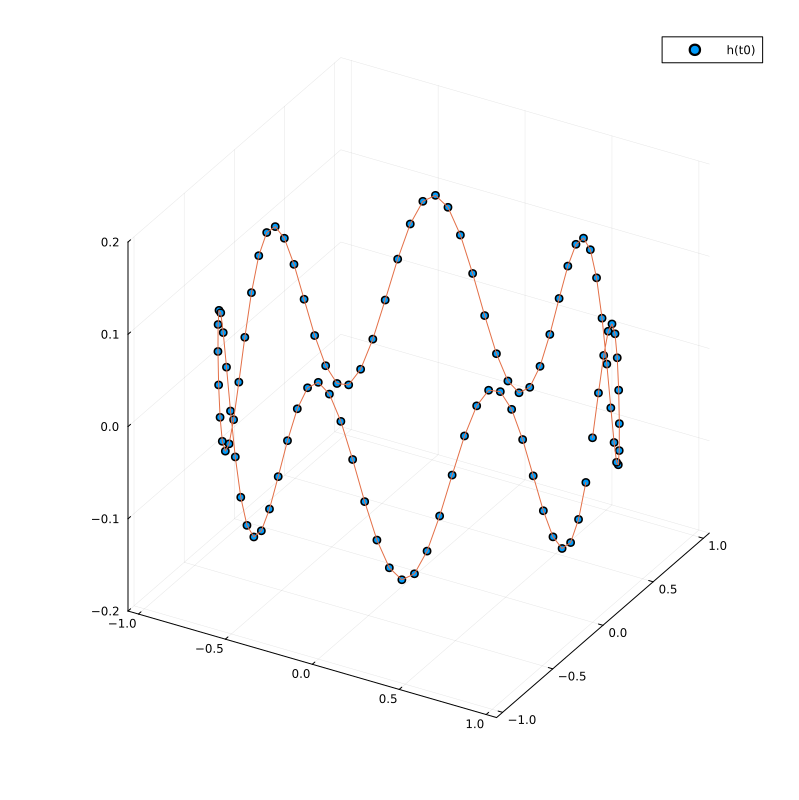

In [73]:
# cycle graph
n=100
g_cycle=cycle_graph(n)
s=(2*pi/n)*(0:(n-1))
xs=cos.(s)
ys=sin.(s)
zs=0.1*sin.(7.0*s)
#graphplot(g_cycle, dim=3, x=xs, y=ys, z=zs, curves=false, linewidth=2, nodeshape=:circle, nodesize=0.2, fontsize=8, size=(800,800))
scatter(xs, ys, zs, size=(800,800), zlims=(-0.2,0.2),label="h(t0)")
plot!(xs,ys,zs, label=nothing)


In [71]:
@show edges(g_cycle)

edges(g_cycle) = SimpleEdgeIter 40


SimpleEdgeIter 40